In [40]:
from sklearn.preprocessing import LabelEncoder
from kmodes.kprototypes import KPrototypes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load both datasets
data_adj = pd.read_csv("cvd_adj.csv")
data_new = pd.read_csv("cvd_manually_cut.csv")
data_smot = pd.read_csv("cvd_smotenc.csv", compression="gzip")

In [43]:
# Identify numerical columns (same for both datasets)
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI']

In [50]:
# Define a function to perform K-Prototypes clustering on a dataset
def apply_kprototypes(data, n_clusters=5, sample_size=None):
    # Optionally sample data to reduce the size
    if sample_size:
        data = data.sample(n=sample_size, random_state=42)

    # Identify categorical columns (anything that is not in numerical columns)
    categorical_cols = [col for col in data.columns if col not in numerical_cols]
    
    # Label encode categorical columns
    label_encoders = {}
    for col in categorical_cols:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le
    
    # Combine numerical and encoded categorical data for K-Prototypes
    combined_data = data[numerical_cols + categorical_cols].copy()
    
    # Apply K-Prototypes clustering
    kproto = KPrototypes(n_clusters=n_clusters, init='Huang', random_state=42)
    clusters = kproto.fit_predict(combined_data, categorical=[combined_data.columns.get_loc(col) for col in categorical_cols])
    
    # Add cluster assignments back to the dataset
    data['Cluster'] = clusters
    
    return data

In [51]:
# Apply the function to both datasets with a sample size to reduce processing time
data_adj_clustered = apply_kprototypes(data_adj.copy(), sample_size=100)
data_new_clustered = apply_kprototypes(data_new.copy(), sample_size=100)
data_smot_clustered = apply_kprototypes(data_smot.copy(),sample_size=100)

In [52]:
# Display the clustered datasets
print("Clustered data_adj.csv sample:")
print(data_adj_clustered[['Cluster', 'Heart_Disease_Yes']].head())  

print("\nClustered data_new.csv sample:")
print(data_new_clustered[['Cluster', 'Heart_Disease_Yes']].head())  

print("\nClustered data_smot.csv sample:")
print(data_new_clustered[['Cluster', 'Heart_Disease_Yes']].head())

Clustered data_adj.csv sample:
        Cluster  Heart_Disease_Yes
302051        3                  0
59950         1                  0
203639        2                  0
78768         3                  0
216156        0                  0

Clustered data_new.csv sample:
       Cluster  Heart_Disease_Yes
4884         4                  0
23841        0                  0
23278        2                  0
41313        0                  1
36565        3                  0

Clustered data_smot.csv sample:
       Cluster  Heart_Disease_Yes
4884         4                  0
23841        0                  0
23278        2                  0
41313        0                  1
36565        3                  0


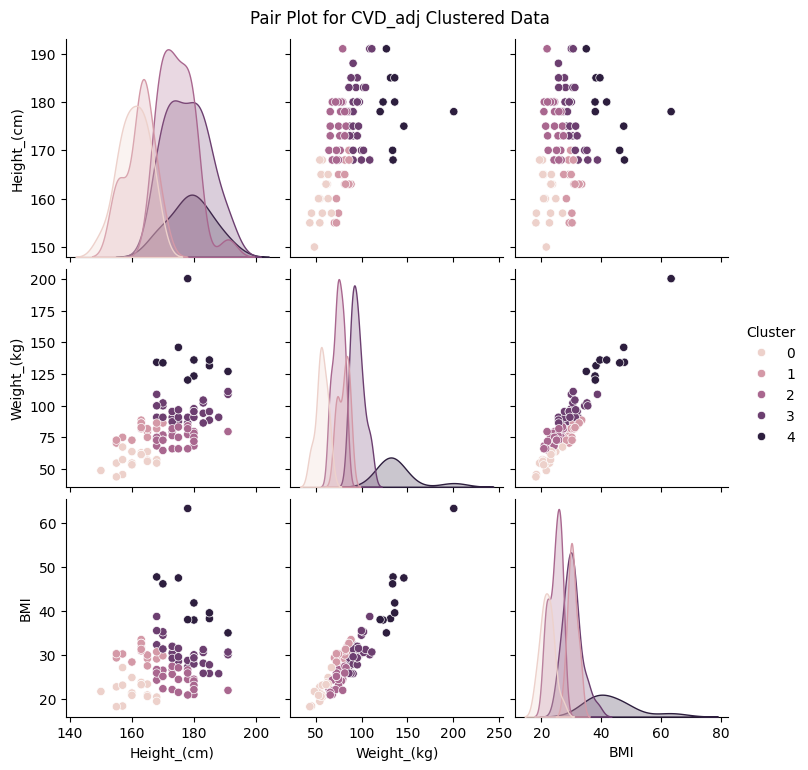

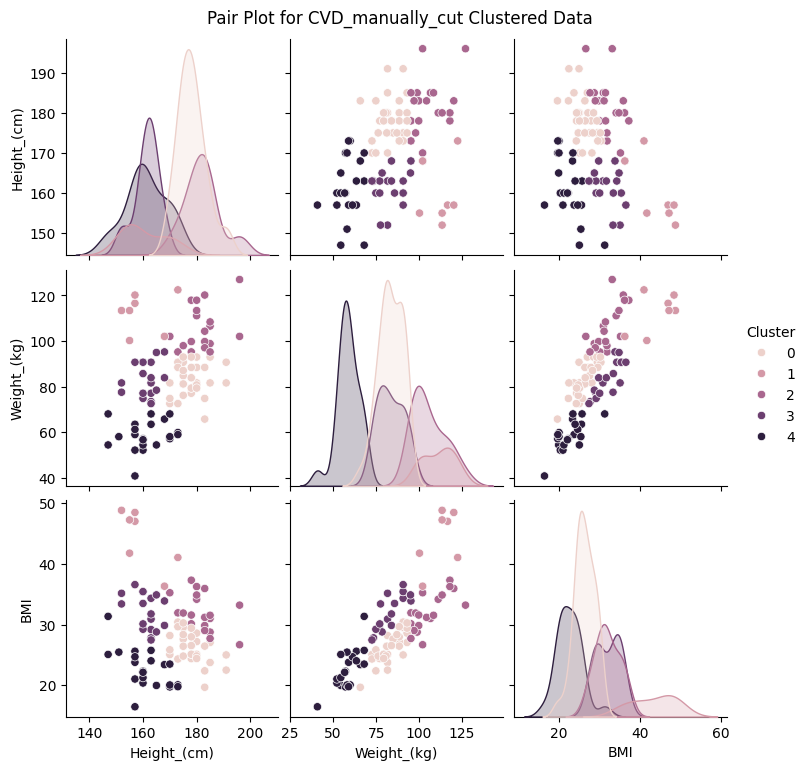

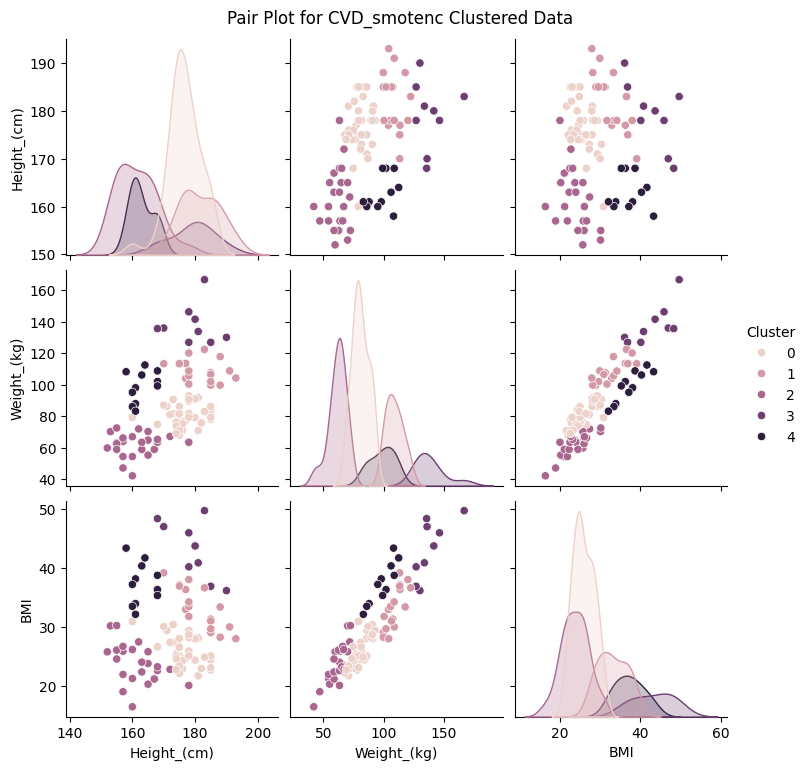

In [53]:
# Create pair plots for both datasets (adjust features as needed)
sns.pairplot(data_adj_clustered, hue='Cluster', vars=['Height_(cm)', 'Weight_(kg)', 'BMI'])
plt.suptitle('Pair Plot for CVD_adj Clustered Data', y=1.02)
plt.show()

sns.pairplot(data_new_clustered, hue='Cluster', vars=['Height_(cm)', 'Weight_(kg)', 'BMI'])
plt.suptitle('Pair Plot for CVD_manually_cut Clustered Data', y=1.02)
plt.show()

sns.pairplot(data_smot_clustered, hue='Cluster', vars=['Height_(cm)', 'Weight_(kg)', 'BMI'])
plt.suptitle('Pair Plot for CVD_smotenc Clustered Data', y=1.02)
plt.show()